In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

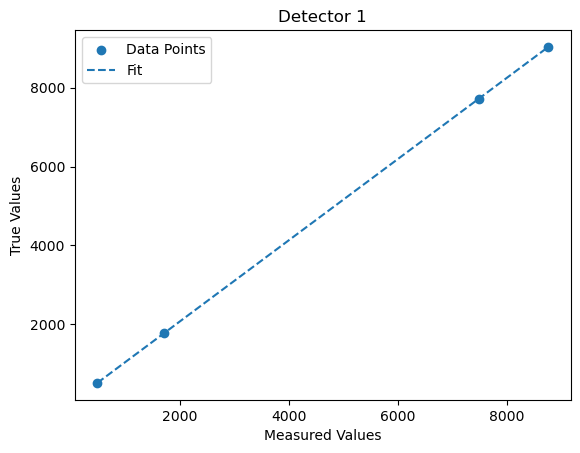

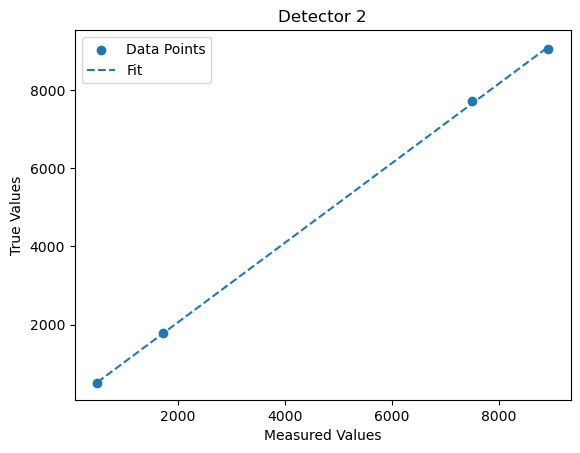

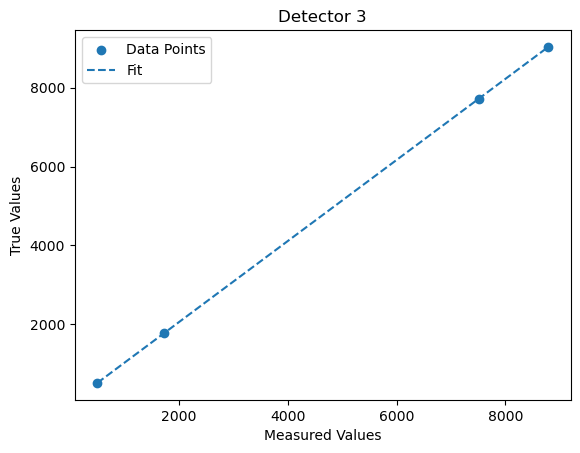

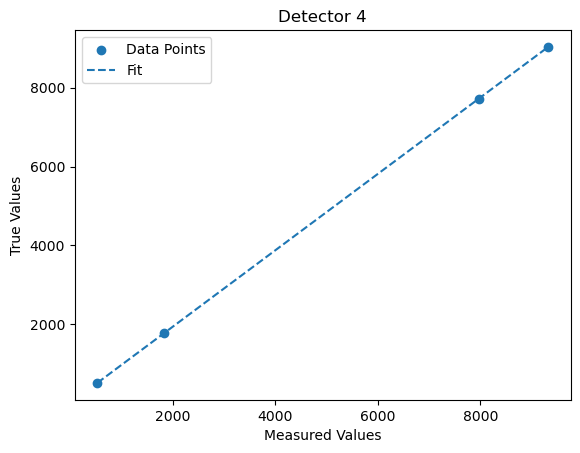

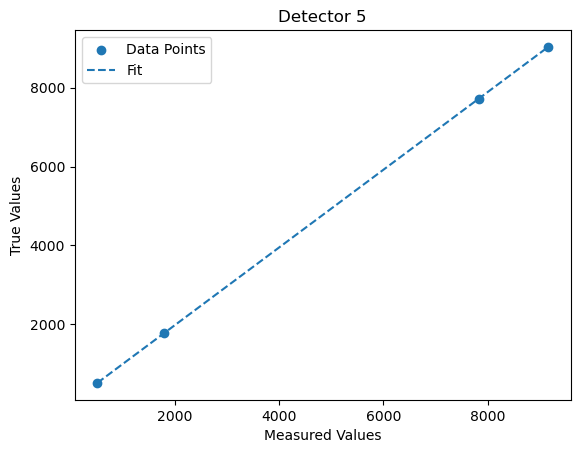

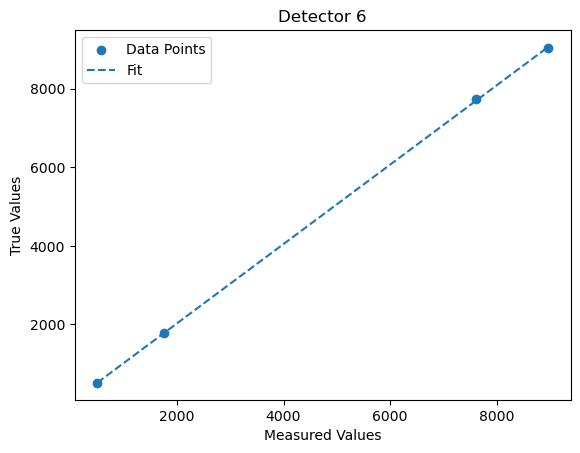

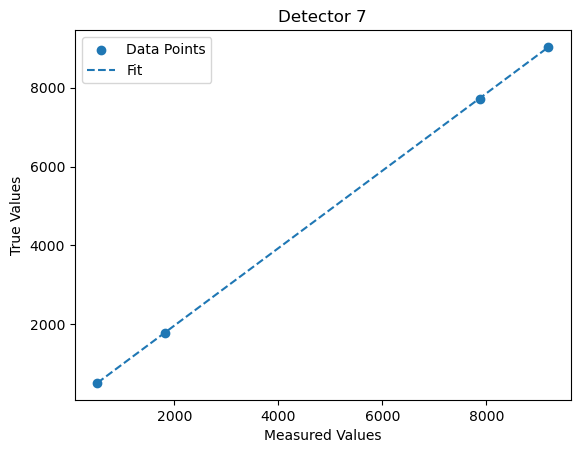

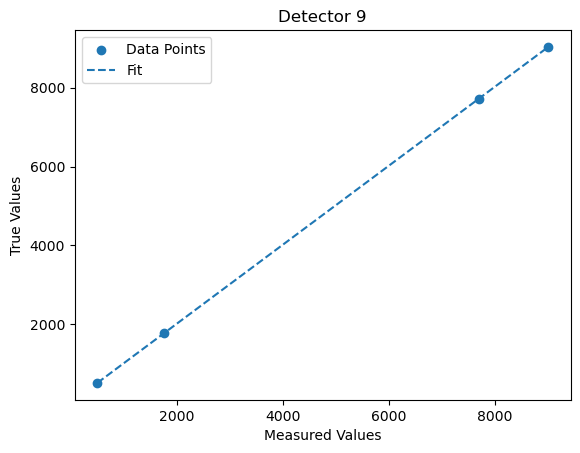

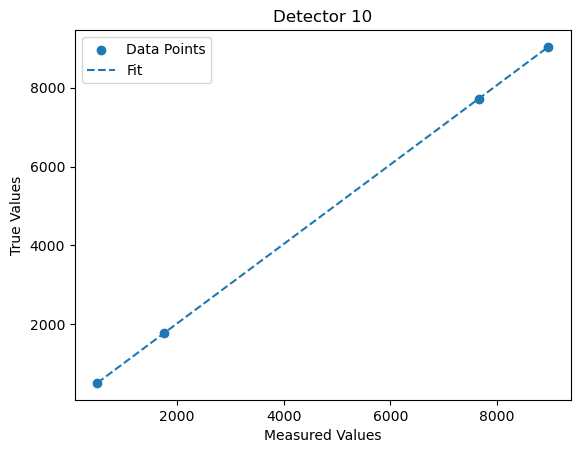

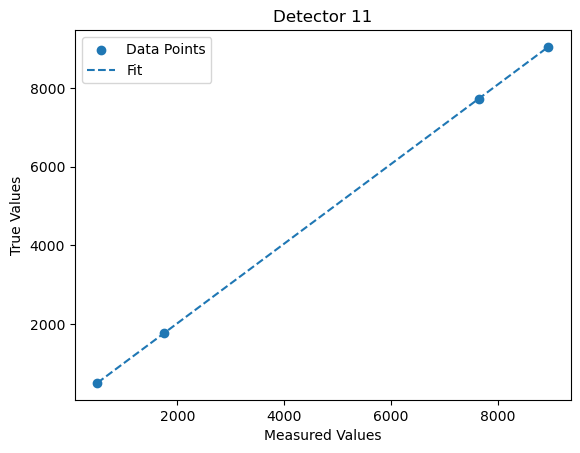

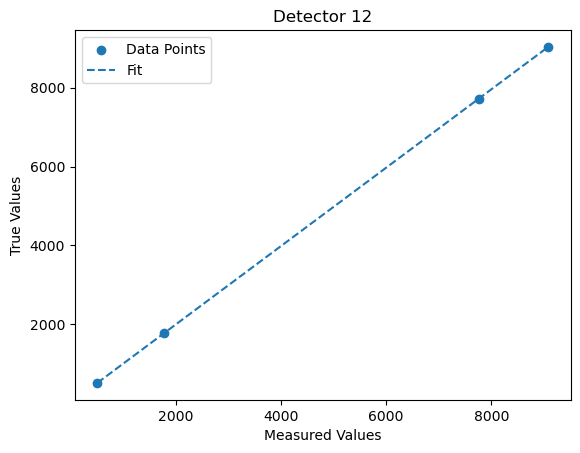

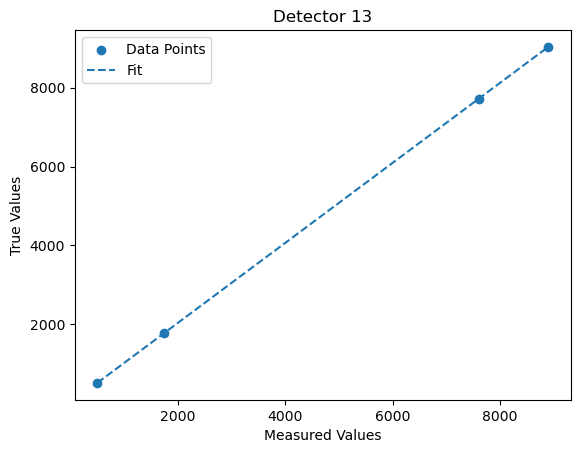

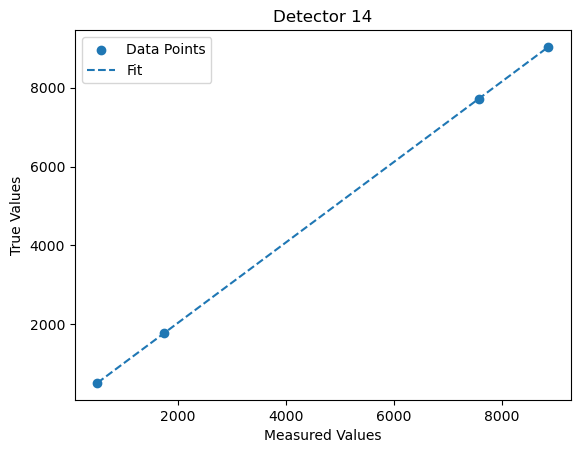

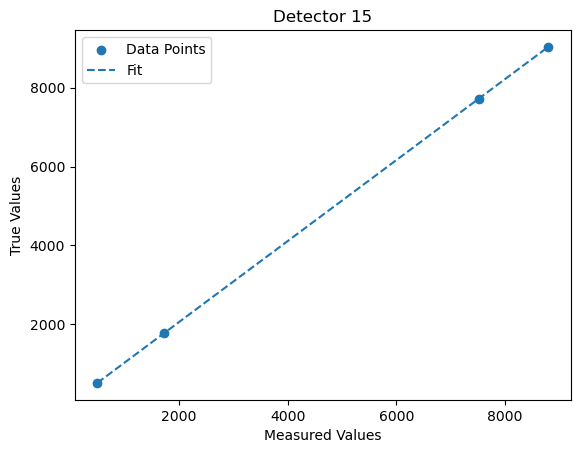

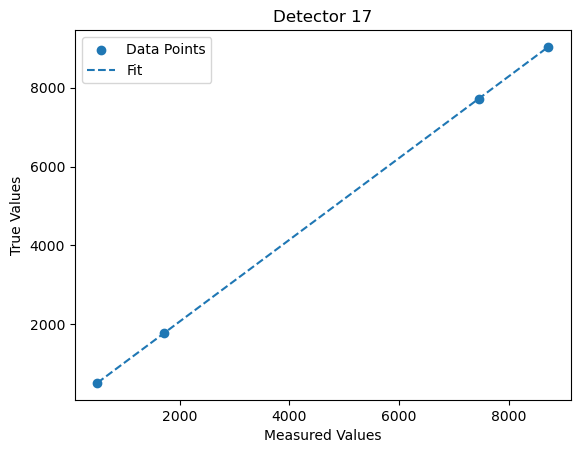

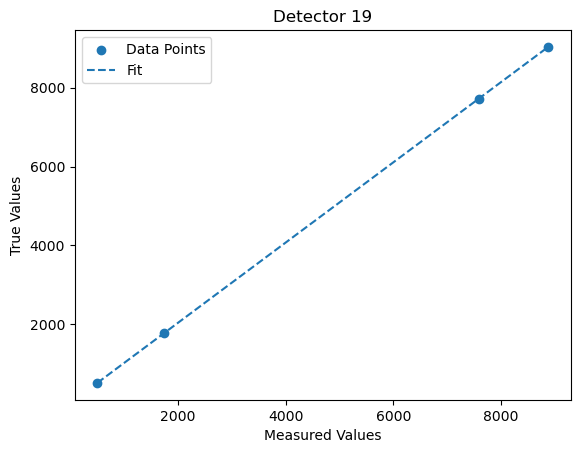

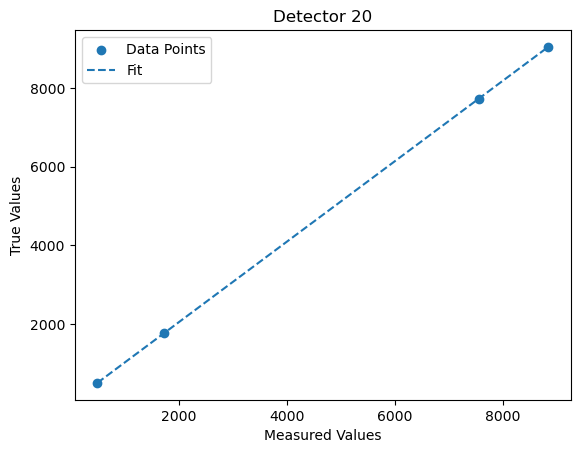

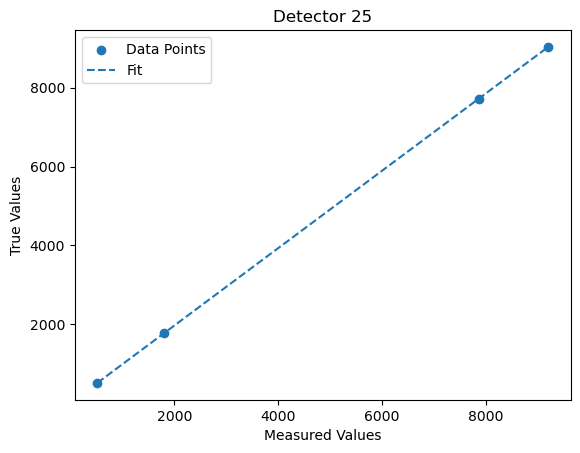

,det,slope,offset
0,1,1.031697,0.716083
1,2,1.017476,23.361189
2,3,1.027735,2.045683
3,4,0.968985,1.620048
4,5,0.986260,2.062045
5,6,1.008972,9.235992
6,7,0.982536,-1.823597
7,9,1.003506,0.867301
8,10,1.007882,1.521176
9,11,1.010884,2.002238


In [5]:


det = np.array([1,2,3,4,5,6,7,9,10,11,12,13,14,15,17,19,20,25])
ph_511  = np.array([494,495,495,526,516,503,520,508,506,504,513,503,501,496,494,501,498,518])
ph_1779 = np.array([1724,1722,1729,1834,1802,1753,1813,1772,1763,1758,1788,1751,1745,1730,1716,1746,1738,1809])
ph_7724 = np.array([7488,7493,7515,7969,7828,7616,7873,7698,7662,7635,7764,7607,7582,7515,7453,7584,7549,7859])
ph_9034 = np.array([8754,8919,8787,9322,9159,8970,9188,9000,8962,8938,9081,8897,8863,8793,8722,8874,8837,9195])


# df = pd.DataFrame({"det":det,"ph_511":ph_511,"ph_1368":ph_1368,"ph_2754":ph_2754})
# df

def linear_func(x, a, b):
    return a * x + b

slope = []
offset=[]
for i in range(len(det)):
    x = np.array([ph_511[i], ph_1779[i], ph_7724[i], ph_9034[i]])
    y = np.array([511, 1779, 7724, 9034])
    
    poly = np.polynomial.Polynomial.fit(x, y, deg=1)
    # slope.append(poly.convert().coef[1])
    # offset.append(poly.convert().coef[0])
    
    params, covariance = curve_fit(linear_func, x, y)
    slope.append(params[0])
    offset.append(params[1])
    
    fit_x = np.linspace(min(x), max(x), 500)
    fit_y = poly(fit_x)
    
    plt.figure()
    plt.scatter(x, y, label='Data Points')
    plt.plot(fit_x, fit_y, label='Fit', linestyle='--')
    plt.title(f'Detector {det[i]}')
    plt.xlabel('Measured Values')
    plt.ylabel('True Values')
    plt.legend()
    plt.show()






    

df_results = pd.DataFrame({"det":det,"slope":slope,"offset":offset})
df_results


In [9]:
df_results.to_csv("../calib/calib_2019apr.csv",index=False)